## Packt - Assessment
#### * Providing a week wise report of win back users,who joined back in 7- 60 days after churning are called win back users.
#### * Extracting a possible insights out of the given dataset.

In [1]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data into a DataFrame
df = pd.read_excel(r'C:/Users/User/Downloads/packt-task/assignment_sample_data.xlsx') 

In [3]:
# Made a duplicate of raw data so any analysis or changes will not be impact on original data
data = df.copy()

In [4]:
data.head()

,account_number,subscription_id,rateplan_name,invoice_number,invoice_date,payment_number,payment_date,payment_status,amount
0,77de58-7bb9-f49a,000028a155,Monthly,INV005755C4,2023-02-28,P-00AEF03C,2023-02-28,Processed,25.11
1,c28566-0770-576c,0000a8c42d,Monthly - Five Month Offer,INV001E929D,2023-03-26,P-001B9388,2023-03-26,Processed,10.18
2,196d11-bafa-3abd,00006a7e2f,Monthly Subscription Packt,INV00130060,2023-02-28,P-004DB4FA,2023-03-01,Error,4.17
3,275f75-5d77-2bf4,00008b4bab,Packt Monthly Subscription,INV003B6F2E,2023-04-14,P-009FCF35,2023-04-14,Processed,10.43
4,2f8016-2237-4631,0000aebd19,Annual - Launch Offer,INV00400BA0,2023-04-29,P-00F3722C,2023-04-29,Error,104.19


In [5]:
data.shape

(2000, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   account_number   2000 non-null   object        
 1   subscription_id  2000 non-null   object        
 2   rateplan_name    2000 non-null   object        
 3   invoice_number   2000 non-null   object        
 4   invoice_date     2000 non-null   datetime64[ns]
 5   payment_number   2000 non-null   object        
 6   payment_date     2000 non-null   datetime64[ns]
 7   payment_status   2000 non-null   object        
 8   amount           2000 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 140.8+ KB


### Dropping columns that are irrelevant for the analysis

In [7]:
data.columns

Index(['account_number', 'subscription_id', 'rateplan_name', 'invoice_number',
       'invoice_date', 'payment_number', 'payment_date', 'payment_status',
       'amount'],
      dtype='object')

In [8]:
data = data.drop(['subscription_id','invoice_number','payment_number','amount'], axis = 1)

In [9]:
data.head()

,account_number,rateplan_name,invoice_date,payment_date,payment_status
0,77de58-7bb9-f49a,Monthly,2023-02-28,2023-02-28,Processed
1,c28566-0770-576c,Monthly - Five Month Offer,2023-03-26,2023-03-26,Processed
2,196d11-bafa-3abd,Monthly Subscription Packt,2023-02-28,2023-03-01,Error
3,275f75-5d77-2bf4,Packt Monthly Subscription,2023-04-14,2023-04-14,Processed
4,2f8016-2237-4631,Annual - Launch Offer,2023-04-29,2023-04-29,Error


In [10]:
# Checking null values
data.isna().sum()

account_number    0
rateplan_name     0
invoice_date      0
payment_date      0
payment_status    0
dtype: int64

##### Calculating the number of days between churn date and join back date

In [11]:
data["days_between"] = (data["payment_date"] - data["invoice_date"]).dt.days

In [12]:
data.head()

,account_number,rateplan_name,invoice_date,payment_date,payment_status,days_between
0,77de58-7bb9-f49a,Monthly,2023-02-28,2023-02-28,Processed,0
1,c28566-0770-576c,Monthly - Five Month Offer,2023-03-26,2023-03-26,Processed,0
2,196d11-bafa-3abd,Monthly Subscription Packt,2023-02-28,2023-03-01,Error,1
3,275f75-5d77-2bf4,Packt Monthly Subscription,2023-04-14,2023-04-14,Processed,0
4,2f8016-2237-4631,Annual - Launch Offer,2023-04-29,2023-04-29,Error,0


##### Creating a new column to identify win back users
##### Identifying win back user 

In [13]:
data["Win_Back_User"] = data["days_between"].apply(lambda x: "Yes" if 7 <= x <= 60 else "No")

In [14]:
data.head()

,account_number,rateplan_name,invoice_date,payment_date,payment_status,days_between,Win_Back_User
0,77de58-7bb9-f49a,Monthly,2023-02-28,2023-02-28,Processed,0,No
1,c28566-0770-576c,Monthly - Five Month Offer,2023-03-26,2023-03-26,Processed,0,No
2,196d11-bafa-3abd,Monthly Subscription Packt,2023-02-28,2023-03-01,Error,1,No
3,275f75-5d77-2bf4,Packt Monthly Subscription,2023-04-14,2023-04-14,Processed,0,No
4,2f8016-2237-4631,Annual - Launch Offer,2023-04-29,2023-04-29,Error,0,No


In [15]:
win_back_users = data[data["Win_Back_User"] == "Yes"]

In [16]:
win_back_users

,account_number,rateplan_name,invoice_date,payment_date,payment_status,days_between,Win_Back_User
26,33f883-7c90-d1f6,Monthly Subscription Packt,2023-04-07,2023-04-14,Error,7,Yes
50,151eec-8f27-fc4a,Packt Monthly Subscription,2023-05-01,2023-05-08,Error,7,Yes
93,fd592e-aa3d-a4a1,Packt Monthly Subscription,2023-04-16,2023-04-23,Error,7,Yes
99,7110ae-9669-999f,Packt Monthly Subscription,2023-03-22,2023-03-29,Error,7,Yes
115,d3c4c7-3b9d-5466,Monthly - Launch Offer,2023-02-25,2023-03-04,Error,7,Yes
143,f47a16-376d-2466,Monthly - Launch Offer,2023-04-17,2023-04-24,Error,7,Yes
221,b32277-d8b3-6ddc,Packt Monthly Subscription,2023-03-23,2023-03-30,Error,7,Yes
227,20ff68-1331-b8cb,Monthly - Launch Offer,2023-05-11,2023-05-18,Error,7,Yes
238,a2623f-6194-cf5f,Packt Monthly Subscription,2023-02-01,2023-02-08,Error,7,Yes
279,7f5fb5-0e2a-d54e,Packt Monthly Subscription,2023-02-22,2023-03-01,Error,7,Yes


### Weekly- Report

In [17]:
win_back_users['activity_week'] = win_back_users['invoice_date'].dt.strftime('%d-%b-%Y')

C:\Users\User\AppData\Local\Temp\ipykernel_7236\4100819404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_back_users['activity_week'] = win_back_users['invoice_date'].dt.strftime('%d-%b-%Y')


In [18]:
weekly_report = win_back_users.groupby(['account_number', 'activity_week']).size().reset_index()

In [19]:
weekly_report.columns = ['account_number', 'activity_week', 'streak_count']

In [20]:
print(weekly_report)

      account_number activity_week  streak_count
0   04c0ec-24c8-3588   05-May-2023             1
1   099e4a-6f74-5cd1   19-Mar-2023             1
2   0b2f10-bd6a-4552   24-Apr-2023             1
3   11af50-a682-87e3   11-Apr-2023             1
4   151eec-8f27-fc4a   01-May-2023             1
5   1cd1e4-454d-c0b5   22-Mar-2023             1
6   20ff68-1331-b8cb   11-May-2023             1
7   295e21-8f55-d24e   29-Apr-2023             1
8   2f8016-2237-4631   29-Apr-2023             1
9   33f883-7c90-d1f6   07-Apr-2023             1
10  3472a0-5611-780b   11-Apr-2023             1
11  3b0bd2-df70-32b0   12-Apr-2023             1
12  6d2755-3491-f2c8   09-Mar-2023             1
13  7110ae-9669-999f   22-Mar-2023             1
14  7c5103-c52e-6daa   14-Apr-2023             1
15  7f5fb5-0e2a-d54e   22-Feb-2023             1
16  85ede3-4085-95d8   18-Apr-2023             1
17  8c2087-9b6d-ee06   17-Mar-2023             1
18  8f8c55-6f5e-7eaa   21-Apr-2023             1
19  8ffc63-233f-b42b

# INSIGHTS

In [21]:
df.head()

,account_number,subscription_id,rateplan_name,invoice_number,invoice_date,payment_number,payment_date,payment_status,amount
0,77de58-7bb9-f49a,000028a155,Monthly,INV005755C4,2023-02-28,P-00AEF03C,2023-02-28,Processed,25.11
1,c28566-0770-576c,0000a8c42d,Monthly - Five Month Offer,INV001E929D,2023-03-26,P-001B9388,2023-03-26,Processed,10.18
2,196d11-bafa-3abd,00006a7e2f,Monthly Subscription Packt,INV00130060,2023-02-28,P-004DB4FA,2023-03-01,Error,4.17
3,275f75-5d77-2bf4,00008b4bab,Packt Monthly Subscription,INV003B6F2E,2023-04-14,P-009FCF35,2023-04-14,Processed,10.43
4,2f8016-2237-4631,0000aebd19,Annual - Launch Offer,INV00400BA0,2023-04-29,P-00F3722C,2023-04-29,Error,104.19


##### Count the occurrences of each payment status

In [22]:
# Count the occurrences of each payment status
payment_status_counts = df["payment_status"].value_counts()
payment_status_counts

Processed    1480
Error         520
Name: payment_status, dtype: int64

Text(0.5, 1.0, 'Total occurrences of each payment status')

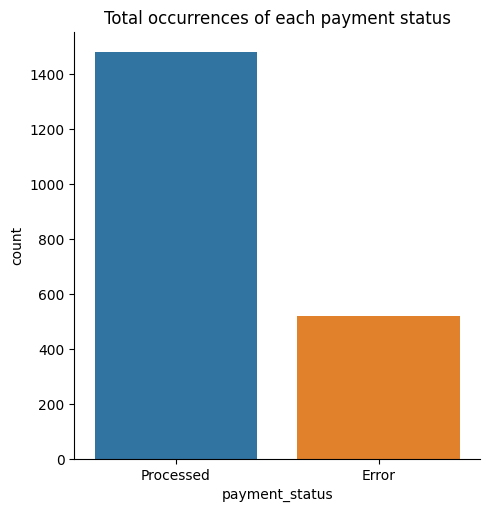

In [23]:
sns.catplot(data = df , x = 'payment_status', kind = 'count')
plt.title('Total occurrences of each payment status')

##### Calculate the total amount received for each payment status

In [24]:
# Calculate the total amount received for each payment status
total_amount_by_status = df.groupby("payment_status")["amount"].sum()
total_amount_by_status

payment_status
Error         8002.40
Processed    19382.84
Name: amount, dtype: float64

Text(0.5, 1.0, 'Total amount received for each payment status')

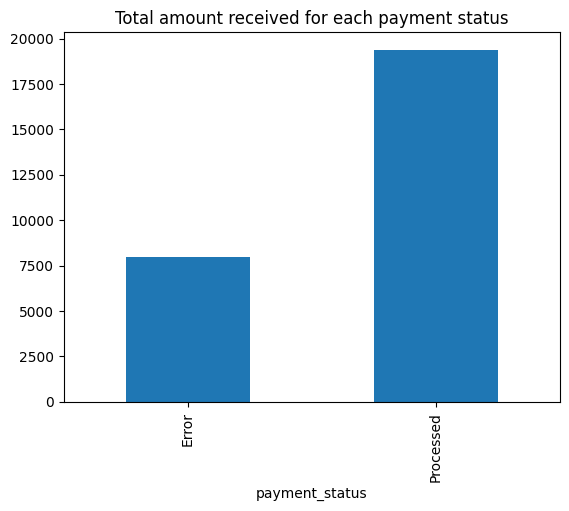

In [25]:
total_amount_by_status = df.groupby("payment_status")["amount"].sum().plot(kind = 'bar')
plt.title('Total amount received for each payment status')

##### Count the occurrences of each rate plan

In [26]:
# Count the occurrences of each rate plan
rateplan_counts = df["rateplan_name"].value_counts()
rateplan_counts

Packt Monthly Subscription            696
Monthly - Launch Offer                533
Monthly - Five Month Offer            274
Monthly Subscription Packt            136
Monthly - 7 Day Trial                  72
Packt Monthly Subscription - Offer     68
Annual - Launch Offer                  43
Packt Monthly - Limited Offer          34
Monthly - Bundle Offer                 31
Monthly - Special Renewal Offer        28
18 Months - Special Offer              25
Monthly - Exclusive Offer              17
Monthly - Dec Offer                    13
Monthly                                 8
Monthly Subscription Offer              8
Monthly - Humble Bundle Offer           3
Annual - 60% OFF                        2
Annual - Special Offer                  2
Annual - 50% OFF                        2
Annual                                  1
Annual - Free                           1
18 Months                               1
18 Months Offer                         1
18 Months - 60% OFF               

Text(0.5, 1.0, 'Total occurrences of each rate plan')

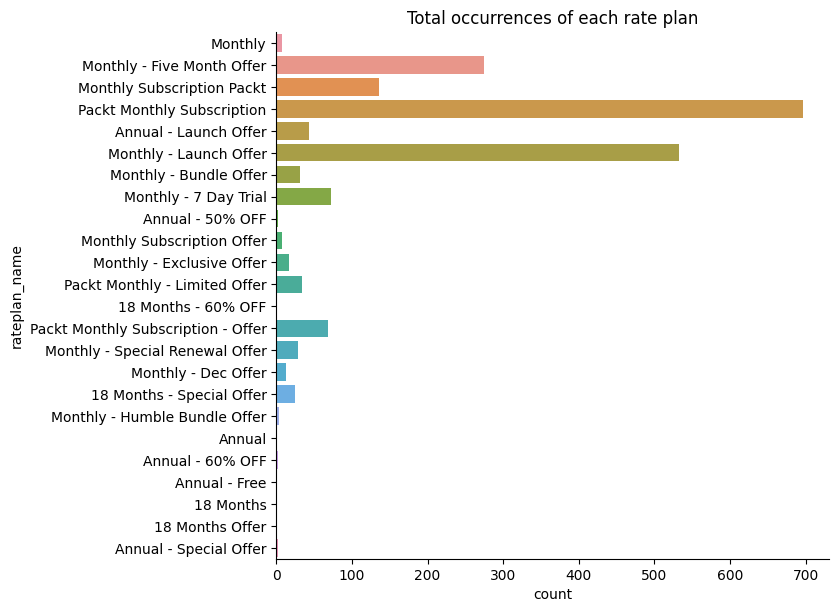

In [27]:
sns.catplot(data = df , y = 'rateplan_name', kind = 'count',height=6, aspect = 11.7/8.27)
plt.title('Total occurrences of each rate plan')

##### Calculate the total amount for each rate plan

In [28]:
# Calculate the total amount for each rate plan
total_amount_by_rateplan = df.groupby("rateplan_name")["amount"].sum()
total_amount_by_rateplan

rateplan_name
18 Months                              145.76
18 Months - 60% OFF                    144.83
18 Months - Special Offer             3514.19
18 Months Offer                        107.29
Annual                                  49.99
Annual - 50% OFF                       191.43
Annual - 60% OFF                       210.10
Annual - Free                          241.26
Annual - Launch Offer                 4329.91
Annual - Special Offer                 209.87
Monthly                                195.15
Monthly - 7 Day Trial                  716.40
Monthly - Bundle Offer                 315.46
Monthly - Dec Offer                    135.25
Monthly - Exclusive Offer              153.38
Monthly - Five Month Offer            2197.08
Monthly - Humble Bundle Offer           30.60
Monthly - Launch Offer                5280.65
Monthly - Special Renewal Offer        285.25
Monthly Subscription Offer              83.26
Monthly Subscription Packt             975.53
Packt Monthly - Limi

Text(0.5, 1.0, 'Total amount for each rate-plan')

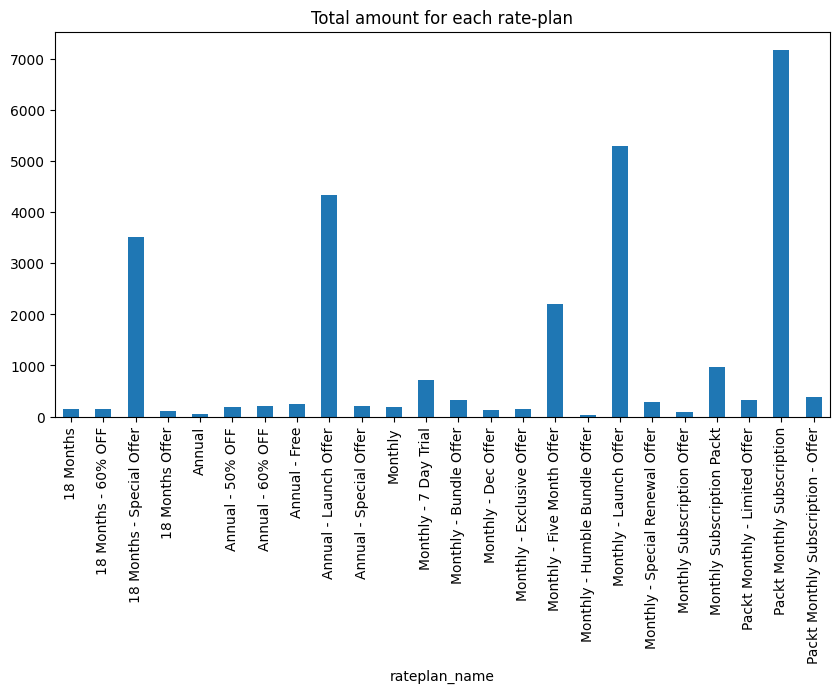

In [29]:
plt.figure(figsize=(10,5))
df.groupby("rateplan_name")["amount"].sum().plot(kind = 'bar')
plt.title('Total amount for each rate-plan')

In [30]:
win_back_users

,account_number,rateplan_name,invoice_date,payment_date,payment_status,days_between,Win_Back_User,activity_week
26,33f883-7c90-d1f6,Monthly Subscription Packt,2023-04-07,2023-04-14,Error,7,Yes,07-Apr-2023
50,151eec-8f27-fc4a,Packt Monthly Subscription,2023-05-01,2023-05-08,Error,7,Yes,01-May-2023
93,fd592e-aa3d-a4a1,Packt Monthly Subscription,2023-04-16,2023-04-23,Error,7,Yes,16-Apr-2023
99,7110ae-9669-999f,Packt Monthly Subscription,2023-03-22,2023-03-29,Error,7,Yes,22-Mar-2023
115,d3c4c7-3b9d-5466,Monthly - Launch Offer,2023-02-25,2023-03-04,Error,7,Yes,25-Feb-2023
143,f47a16-376d-2466,Monthly - Launch Offer,2023-04-17,2023-04-24,Error,7,Yes,17-Apr-2023
221,b32277-d8b3-6ddc,Packt Monthly Subscription,2023-03-23,2023-03-30,Error,7,Yes,23-Mar-2023
227,20ff68-1331-b8cb,Monthly - Launch Offer,2023-05-11,2023-05-18,Error,7,Yes,11-May-2023
238,a2623f-6194-cf5f,Packt Monthly Subscription,2023-02-01,2023-02-08,Error,7,Yes,01-Feb-2023
279,7f5fb5-0e2a-d54e,Packt Monthly Subscription,2023-02-22,2023-03-01,Error,7,Yes,22-Feb-2023


##### Occurence of payment status of win back users

In [31]:
# Occurence of payment status of win back users
win_back_users['payment_status'].value_counts()

Error        36
Processed     1
Name: payment_status, dtype: int64

Text(0.5, 1.0, 'Total occurrences of payment status of win back users ')

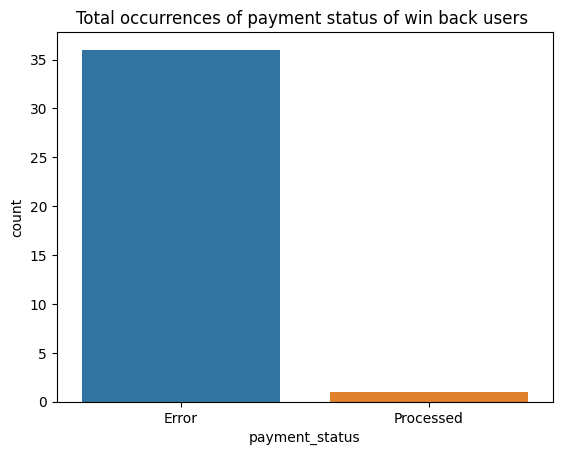

In [32]:
sns.countplot(data = win_back_users, x = 'payment_status')
plt.title('Total occurrences of payment status of win back users ')

##### occurrences of rateplan_name of win back users

In [33]:
# occurrences of rateplan_name of win back users
win_back_users['rateplan_name'].value_counts()

Packt Monthly Subscription    23
Monthly - Launch Offer         7
Monthly Subscription Packt     3
Annual - Launch Offer          2
Monthly - Bundle Offer         1
Monthly - 7 Day Trial          1
Name: rateplan_name, dtype: int64

Text(0.5, 1.0, 'Total occurrences of rateplan_name of win back users')

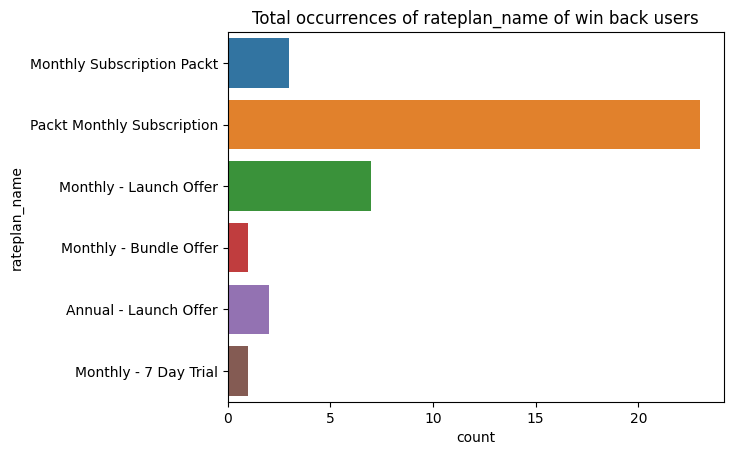

In [34]:
sns.countplot(data = win_back_users, y = 'rateplan_name')
plt.title('Total occurrences of rateplan_name of win back users')